![](image.jpg)


Dive into the heart of data science with a project that combines healthcare insights and predictive analytics. As a Data Scientist at a top Health Insurance company, you have the opportunity to predict customer healthcare costs using the power of machine learning. Your insights will help tailor services and guide customers in planning their healthcare expenses more effectively.

## Dataset Summary

Meet your primary tool: the `insurance.csv` dataset. Packed with information on health insurance customers, this dataset is your key to unlocking patterns in healthcare costs. Here's what you need to know about the data you'll be working with:

## insurance.csv
| Column    | Data Type | Description                                                      |
|-----------|-----------|------------------------------------------------------------------|
| `age`       | int       | Age of the primary beneficiary.                                  |
| `sex`       | object    | Gender of the insurance contractor (male or female).             |
| `bmi`       | float     | Body mass index, a key indicator of body fat based on height and weight. |
| `children`  | int       | Number of dependents covered by the insurance plan.              |
| `smoker`    | object    | Indicates whether the beneficiary smokes (yes or no).            |
| `region`    | object    | The beneficiary's residential area in the US, divided into four regions. |
| `charges`   | float     | Individual medical costs billed by health insurance.             |



A bit of data cleaning is key to ensure the dataset is ready for modeling. Once your model is built using the `insurance.csv` dataset, the next step is to apply it to the `validation_dataset.csv`. This new dataset, similar to your training data minus the `charges` column, tests your model's accuracy and real-world utility by predicting costs for new customers.

## Let's Get Started!

This project is your playground for applying data science in a meaningful way, offering insights that have real-world applications. Ready to explore the data and uncover insights that could revolutionize healthcare planning? Let's begin this exciting journey!

In [7]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Loading the insurance dataset
insurance_data_path = 'insurance.csv'
insurance = pd.read_csv(insurance_data_path)
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


Data inspection and cleaning.


In [8]:
#check the dataframe info
print(insurance.info())

#check for missing data
print(insurance.isna().sum())

#check if the missing data prop is <=5% of the entire dataframe
missing_data_prop=(insurance.isna().sum().sum()/insurance.size)*100

print(missing_data_prop)

#since the proportion of missing data is 4.80 which is lesser than 5, i'll drop the missing values.
insurance.dropna(inplace=True)

insurance.info()

#check if the new dataframe has missing values
print(insurance.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB
None
age         66
sex         66
bmi         66
children    66
smoker      66
region      66
charges     54
dtype: int64
4.804612427930813
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   float64
 1   sex       1208 non-null   object 
 2   bmi       1208 non-null   float64
 3   children  1208 non-null   float64
 4   smok

In [9]:
#dealing with the dtypes and cleaning
insurance['age']=insurance['age'].astype('int')
insurance['children']=insurance['children'].astype('int')
insurance['charges']=insurance['charges'].str.replace('$','',regex=True).astype('float')
insurance['sex']=insurance['sex'].astype('category')
insurance['region']=insurance['region'].astype('category')
insurance['smoker']=insurance['smoker'].astype('category')

#print(insurance.info())
#print(insurance['charges'].isna().sum())
mean_charge=insurance['charges'].mean()
print(mean_charge)
insurance['charges'].fillna(mean_charge,inplace=True)
#print(insurance.info())


#insurance.head()
#print(insurance.info())
sex_dict={'M':'male','man':'male','F':'female','woman':'female'}
insurance['sex']=insurance['sex'].replace(sex_dict)

#fix inconsistencies
region_dict={'southeast':'Southeast','southwest':'Southwest','northeast':'Northeast','northwest':'Northwest'}
insurance['region']=insurance['region'].replace(region_dict)
print(insurance['region'].value_counts())
print(insurance['smoker'].value_counts())

#after 1000 backs and forths, i've decided to encode the categorical columns
insurance=pd.get_dummies(insurance,columns=['sex','region','smoker'],drop_first=True)
insurance.info()

#noticed some of the age values are in minus, as how?
df=insurance[insurance['age']<0]
df.head()

#use absolute to make the values positive
insurance['age']=insurance['age'].abs()

      

13311.2739473314
Southeast    322
Southwest    297
Northeast    295
Northwest    294
Name: region, dtype: int64
no     960
yes    248
Name: smoker, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1208 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1208 non-null   int64  
 1   bmi               1208 non-null   float64
 2   children          1208 non-null   int64  
 3   charges           1208 non-null   float64
 4   sex_male          1208 non-null   uint8  
 5   region_Northwest  1208 non-null   uint8  
 6   region_Southeast  1208 non-null   uint8  
 7   region_Southwest  1208 non-null   uint8  
 8   smoker_yes        1208 non-null   uint8  
dtypes: float64(2), int64(2), uint8(5)
memory usage: 53.1 KB


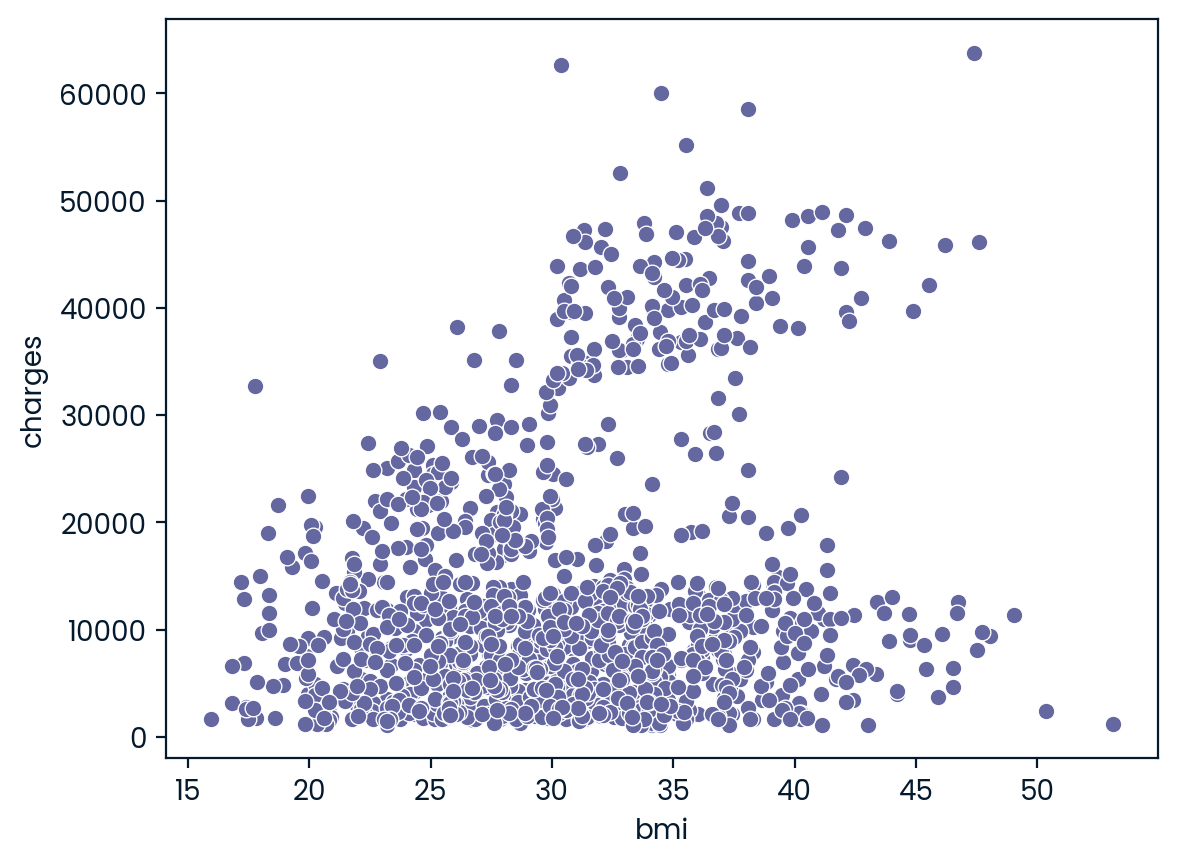

In [10]:
# Check for correlation
import seaborn as sns
import matplotlib.pyplot as plt


sns.scatterplot(x='bmi', y='charges', data=insurance)
plt.show()



## Task Overview:
Develop a regression model using the insurance.csv dataset to predict charges. Evaluate the model's accuracy using the R-Squared Score. Then, apply the model to estimate predicted_charges for unseen data in validation_dataset.csv.

### Task 1:
Build a regression model to predict charges using the insurance.csv dataset. Evaluate the R-Squared Score of your trained model and save it as a variable named r2_score. The model's success will be assessed based on its R-Squared Score, which must exceed a threshold of 0.65.

### Task 2:
Use the trained model to predict charges for the data in validation_dataset.csv. Store the predictions in a new column named predicted_charges within the validation dataset, and save it as a pandas DataFrame called validation_data. Ensure a minimum basic charge of 1000.

⚠️ Note: If you encounter errors during model training, make sure the insurance DataFrame is properly cleaned and ready for modeling.

In [11]:
# Task 1
import numpy as np
from statsmodels.formula.api import ols

# response and explanatory variables formula
response_explanatory = 'charges ~  age +bmi+sex_male+ region_Northwest + region_Southeast + region_Southwest+smoker_yes+children'

# Fit the model using the formula and the insurance DataFrame
insurance_model = ols(response_explanatory, data=insurance).fit()
print(insurance_model.params)

print(insurance_model.summary())

# r squared
r2_score=insurance_model.rsquared
print(r2_score)
#threshold stuff
assert r2_score > 0.65



Intercept          -11483.640984
age                   259.240366
bmi                   327.535172
sex_male             -255.247206
region_Northwest     -279.753154
region_Southeast     -817.191172
region_Southwest     -833.755342
smoker_yes          23947.145300
children              335.508307
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     445.0
Date:                Sat, 15 Feb 2025   Prob (F-statistic):               0.00
Time:                        14:37:03   Log-Likelihood:                -12240.
No. Observations:                1208   AIC:                         2.450e+04
Df Residuals:                    1199   BIC:                         2.454e+04
Df Model:                           8                   

the parameters show that as the age increases yearly,the charge increases
by 259.24, the charges for male is 225.24 lesser
than that of females,the north west region's charges is 279.75 
than the rest of the region, the charges increase by 327$ per unit of bmi e.t.c. 

**ps:i dont know why my f stat is 0**

In [14]:
#task2
validation_set=pd.read_csv('validation_dataset.csv')
validation_df=pd.DataFrame(validation_set)
validation_df.head()

#omo! now i have to encode it
validation_df.info()
#check the count of the values
region_dict={'southeast':'Southeast','southwest':'Southwest','northeast':'Northeast','northwest':'Northwest'}
validation_df['region']=validation_df['region'].replace(region_dict)
print(validation_df['sex'].value_counts())
validation_df=pd.get_dummies(validation_df,columns=['sex','region','smoker'],drop_first=True)
validation_df.info()

#df2=validation_df[validation_df['age']]

#predict the charges 
prediction_charges = insurance_model.predict(validation_df)

#assign it to the dataframe
validation_df['prediction_charges'] = prediction_charges

#store the answer in another dataframe and filter it so that the minimum charge will be 1000
prediction_data=validation_df[validation_df['prediction_charges']>=1000]
prediction_data.head()
print(len(prediction_data))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       50 non-null     float64
 1   sex       50 non-null     object 
 2   bmi       50 non-null     float64
 3   children  50 non-null     float64
 4   smoker    50 non-null     object 
 5   region    50 non-null     object 
dtypes: float64(3), object(3)
memory usage: 2.5+ KB
female    25
male      25
Name: sex, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               50 non-null     float64
 1   bmi               50 non-null     float64
 2   children          50 non-null     float64
 3   sex_male          50 non-null     uint8  
 4   region_Northwest  50 non-null     uint8  
 5   region_Southeast  50 non-null     uint8  
 6   r